In [30]:
import numpy as np
### https://docs.python.org/3.1/library/itertools.html#itertools.combinations_with_replacement
from itertools import combinations_with_replacement as cwr 
from itertools import chain

In [31]:
degree = 2
points = [2,3,5,7,11,13]
n = len(points)
new = chain([1], points)
coefs = [np.product(x) for x in cwr(new, degree)]
print(len(coefs))

28


In [36]:
# Given an array of coefficients of an n-variate d-degree polynomial,
#  this function returns length d+1 array in which entry j is
#  the number of nonzero coefficients for monomials of degrees j
def degree_counts(coefs, n, d):
    from scipy.special import comb
    i = 0
    tallies = []
    for deg in range(d + 1):
        terms = comb(n, deg, exact=True, repetition=False)
        if (i + terms) > len(coefs):
            return False
        tallies.append(np.count_nonzero(coefs[i:(i + terms)]))
        i += terms
    return tallies

In [40]:
print(*degree_counts(coefs, n, degree))

1 6 15


In [3]:
# Funtion to compute the minimum number of neighbors HYPPO needs 
#  in terms of the number of variables and the desired polynomial degree
from scipy.special import comb
def neighbors(var, deg):
    return comb(var + deg, deg, exact=True, repetition=False)

In [76]:
# Function to create a heatmap of the above neighbors() function for var=1..max_var and deg=0..max_deg
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from math import log
def neighbors_map(max_var, max_deg, out="", cmap=plt.cm.get_cmap('binary'), legend="Minimum Number of Neighbors"):
    degrees = range(max_deg + 1)
    variables = range(max_var, 0, -1)
    nghbrs = [[neighbors(var, deg) for deg in degrees] for var in variables]
    log_nghbrs = [[log(n) for n in row] for row in nghbrs]

    fig, ax = plt.subplots()
    im = ax.imshow(nghbrs, cmap=cmap, norm=matplotlib.colors.LogNorm())

    # We want to show all ticks...
    ax.set_xticks(range(len(degrees)))
    ax.set_yticks(range(len(variables)))
    # ... and label them with the respective list entries
    ax.set_xlabel('polynomial degree')
    ax.set_xticklabels(degrees)
    ax.set_ylabel('# of variables')
    ax.set_yticklabels(variables)

    # Loop over data dimensions and create text annotations.
    for i in range(len(variables)):
        for j in range(len(degrees)):
            text = ax.text(j, i, nghbrs[i][j], ha="center", va="center", color="r", size=8)

    #ax.set_title(title)
    fig.tight_layout()
    cbar = fig.colorbar(im)
    cbar.set_label('# of neighbors', labelpad=4)
    plt.show()

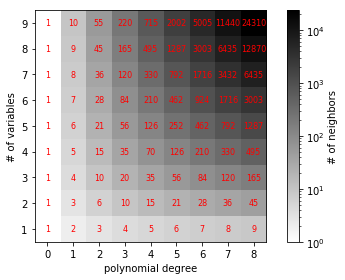

In [77]:
neighbors_map(9,8)